## ОГЛАВЛЕНИЕ


<a id='main'></a>
    
### <a href='#step_1'>Шаг 1. Изучение и предобработка данных</a> 
    
### <a href='#step_2'>Шаг 2. Подготовка данных</a>     

### <a href='#step_3'>Шаг 3. Проанализируем данные</a>    

#### Шаг 3.1<a href='#step_2'> Подготовка данных</a>

#### Шаг 3.2<a href='#step_22'> Подсчет выручки</a>

### <a href='#step_4'>Шаг 4. Составление портрета пользователя каждого региона</a>    



### <a href='#step_5'>Шаг 5. Гипотезы</a>     



### <a href='#step_6'>Шаг 5. Вывод</a> 

## Описание проекта

Данный проект направлен на исследование исторических данных о продажах игр, оценки пользователей и экспертов, жанров и платформ
с целью выявить определяющие успешность игры закономерности. 

Этот проект позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


## Шаг 1. Изучение данных
<a id='step_1'></a>

In [215]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats as st

In [216]:
df = pd.read_csv('/datasets/games.csv')

In [217]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [218]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [220]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

### Вывод

Мы имеем датафрейм 16715 строк и 11 колонок, в 6 колонках наблюдаются пропущенные значения в значительном количестве.

Также сразу видим необходимость замены типа данный в одном столбце и корректировки названий столбцов.

#### <a href='#main'>К оглавлению</a> 

## Шаг 2. Подготовка данных
<a id='step_2'></a>

Приведем названия столбцов к нижнему регистру:

In [221]:
df.columns = [x.lower() for x in df.columns.tolist()]

In [222]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Избавимся от строк с пропущенными значениями в столбце Year_of_Release, Genre и Name, т.к. их менее 2% и заменим тип данных в Year_of_Release на int.

In [224]:
df.dropna(subset=['year_of_release', 'genre','name'], inplace=True)
df['year_of_release'] = df['year_of_release'].astype('int64')

In [225]:
# ДУБЛИКАТЫ

df[df.duplicated(subset=['name', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


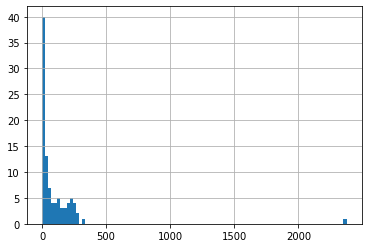

In [227]:
df['user_score'].value_counts().hist(bins=100)
plt.show()

In [228]:
df['user_score'].value_counts().sort_index()

0         1
0.2       2
0.3       2
0.5       2
0.6       2
       ... 
9.4      11
9.5       5
9.6       2
9.7       1
tbd    2376
Name: user_score, Length: 96, dtype: int64

На графике видно, что значение tbd (значение временного отсутствия рейтинга) превалирует в наборе данных по столбцу оценка юзеров. При этом нулевых значений всего одно, поэтому заменим пропуски и значение tbd нулевыми значениями, чтобы можно было изменть тип данных столбца.

In [229]:
#df['user_score'] = df['user_score'].fillna(0)
#df['user_score'].replace('tbd', '0.0', inplace=True)
#df['user_score'].isna().sum()


df['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce')

Заменим тип данных в стобце user_score на float

In [230]:
df['user_score'] = df['user_score'].astype('float64')

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Т.к. у нас различается бальная система оценки игр (100 и 10 бальные), приведем их к 10 бальной

In [233]:
df['critic_score'] = df['critic_score'] / 10
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


##  Вывод

Мы изучили данные, привели значения названий столбцов в должный вид, заменили некоторые типы данных на более подходящие (например в пользовательских оценках вместо типа object мы поставили float).


Также мы заменили пропуски для всех значений в таблице для сохранения ее целостности.

При этом, строки содержащие в себе нулевые значения, значения близкие к 0 (0.1) и пропуски мы выбросили из таблицы как не информативные.

Пропуски в датафрейме наблюдались в столбцах год релиза, названия игры и оценок.

Пропуски в столбце с годом релиза объясняются либо сбоями при сборе информации, либо отсутствием этой информации в октрытых источниках.

Пропуски в столбцах с рейтингами в большей степени объясняются их отсутсвием, и частично также сбоями при сборе этой информации.

#### <a href='#main'>К оглавлению</a> 

## Шаг 3. Анализ данных
<a id='step_3'></a>

В первую очередь добавим столбец с общей суммой продаж по всем регионам.

In [234]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

### Посмотрим, сколько игр выпускалось в разные годы. 

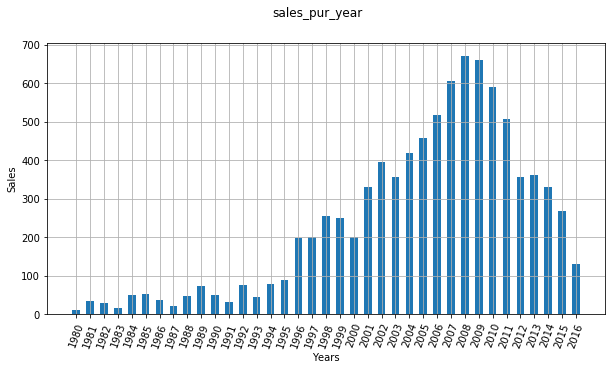

In [235]:
sales_pur_year = df.pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
sales_pur_year = sales_pur_year.reset_index()


fig, axs = plt.subplots(figsize=(10, 5))
axs.bar(np.arange(1980, 2017, 1).tolist(), sales_pur_year.sum_sales, 0.55)
plt.xlabel('Years')
plt.ylabel('Sales')
labels = axs.set_xticks(np.arange(1980, 2017, 1).tolist())
plt.xticks(rotation=70)
plt.grid(True)

fig.suptitle('sales_pur_year')
plt.show()

На данном графике видно, что продажи игр сильно начали расти примерно с 1996 года по 2008, далее идет спад объема продаж. Вероятно это связанно с сокращением количества игр.

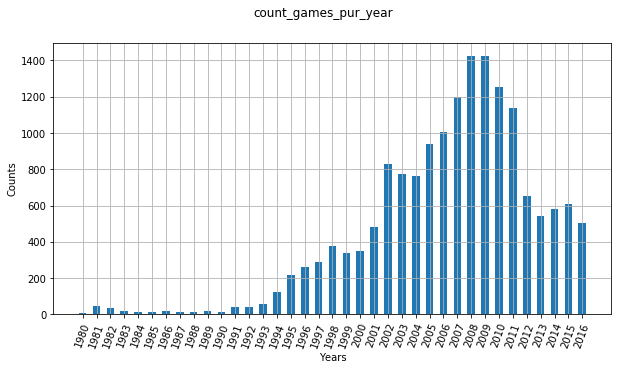

In [236]:
count_games_pur_year = df.pivot_table(index='year_of_release', values='sum_sales', aggfunc='count')
count_games_pur_year = count_games_pur_year.reset_index()


fig, axs = plt.subplots(figsize=(10, 5))
axs.bar(np.arange(1980, 2017, 1).tolist(), count_games_pur_year.sum_sales, 0.55)
plt.xlabel('Years')
plt.ylabel('Counts')
labels = axs.set_xticks(np.arange(1980, 2017, 1).tolist())
plt.xticks(rotation=70)
plt.grid(True)

fig.suptitle('count_games_pur_year')
plt.show()

График количества выпущенных игр по годам подтверждает нашу гипотезу о том, что изменения на графике распределения продаж по годам объясняются разным количеством выпущенных игр.

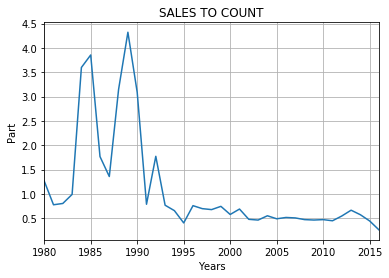

In [237]:
count_of_sales_to_count_of_games = df.groupby('year_of_release').sum().sum_sales / df.groupby('year_of_release').count().name
count_of_sales_to_count_of_games.plot(title='SALES TO COUNT')
plt.ylabel('Part')
plt.xlabel('Years')
plt.grid(True)
plt.show()

На данном графике мы наблюдаем соотношение продаж к количеству игр по годам. 

Мы отчетливо видим, что соотношение практически не менялось, и находилось в районе единицы (на одну игру в среднем 1 млн продаж).

Сильные изменения на графике до 1995 года объясняются крайне низкими значениями количества выпущенных игр.

Итак, мы можем сделать предположение, что количество выпущенных игр не влияет на количество покупок, переменные зависимы, но не влияют друг на друга. 

Предлагаю в дальнейшкм анализе не использовать часть данных до 1991 года из-за сильного дисбаланса.

In [238]:
df_new = df.query('year_of_release > 1991').copy()
df_new.shape

(16182, 12)

### Посмотрим, как менялись продажи по платформам. 



In [239]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


#### Посмотрим как менялись продажи по платформам и выберем топ 5 самых продаваемых по среднемесячному количеству продаж.

In [240]:
x = df_new.pivot_table(index=['platform', 'year_of_release'], values='sum_sales', aggfunc='sum').reset_index()
x = x.groupby(['platform']).sum_sales.mean().reset_index().sort_values(by='sum_sales', ascending=False).round()
x

,platform,sum_sales
15,PS2,103.0
16,PS3,85.0
25,Wii,81.0
3,DS,80.0
27,X360,80.0
17,PS4,79.0
14,PS,73.0
1,3DS,43.0
29,XOne,40.0
5,GBA,39.0


#### Запишем в переменную top5_platform топ 5 платформ по продажам и выведем график распределения по годам

In [241]:
top5_platform = x.head()
top5_platform = top5_platform.platform.tolist()
top5_platform

['PS2', 'PS3', 'Wii', 'DS', 'X360']

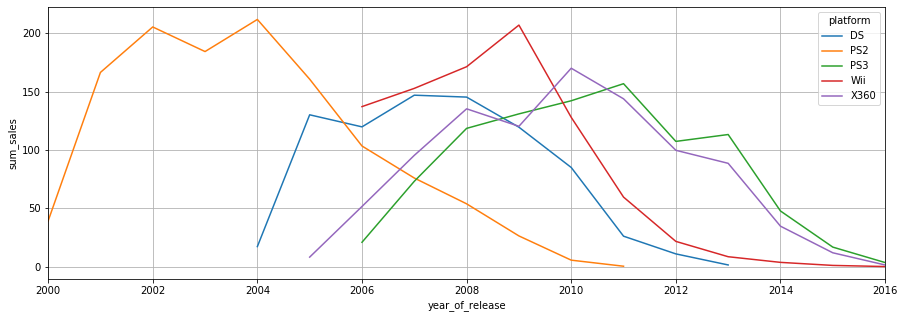

In [242]:
(df_new
       .query('platform in @top5_platform')
       .pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
       .plot(figsize=(15,5))
)
plt.ylabel('sum_sales')
plt.grid(True)
plt.show()

На данном графике мы наблюдаем распределения продаж игр различных платформ по годам.

Графики отдаленно напоминают нормальное распределение, вначале идет рост, а после пика падение. 

Весьма заметна продолжительность жизни платформ, она стремится к 10 годам, где постепенно сокращаются выпуски новых игр до нуля.

#### Теперь мы посмотрим какой период лучше взять для анализа и построения прогнозов на 2017 год.

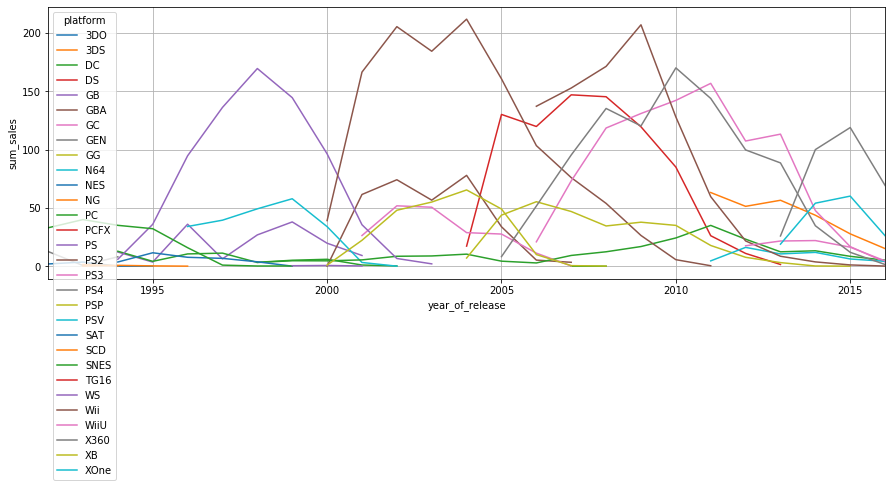

In [243]:
(df_new
       .pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
       .plot(figsize=(15,5))
)
plt.ylabel('sum_sales')
plt.grid(True)
plt.show()

Мы наблюдаем сильное падение в продажах по некоторым платформам к 2010 году, и в этот же год пик продаж у ряда других платформ.
После пика 2010 года заметно сокращение продаж у одних платформ и замещение новыми платформами.

Наиболее полезным для нас будет период 2013 по 2016 год (с выпуска последних моделей).

In [244]:
df_actual = df_new.query('year_of_release >= 2013')

##### Теперь рассмотрим выбранный период более подробно
Определим какие платформы лидируют по продажам, какие растут или падают. Выберем несколько потенциально прибыльных платформ.

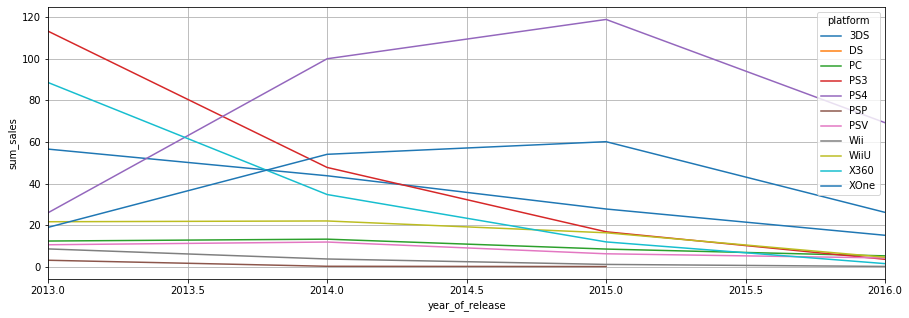

In [246]:
(df_actual
       .pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
       .plot(figsize=(15,5))
)
plt.ylabel('sum_sales')
plt.grid(True)
plt.show()

На графике мы видим, что общая тенденция идет к снижению количества продаж по всем платформам к 2016 году (вероятно на это влияет неполноценнность данных за 2016 год.

Вероятно в 2017 году будут еще востребованы такие платформы как PS4, 3DS и XONE в связи с из "свежестью", остальные же платформы уже подходят к завершению своего жизненного цикла. Вероятно в последующих 2-3 годах будут лидировать платформы PS4 и XONE, и новые платформы, которые могут  выйти в этот период.

##### Посмотрим на график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [247]:
x = (df_actual
       .pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum'))
x

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



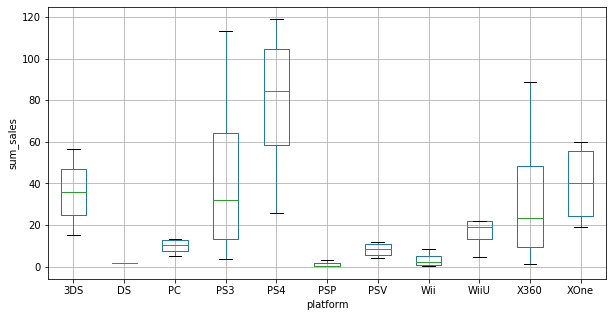

In [248]:
x.boxplot(figsize=(10,5))
plt.ylabel('sum_sales')
plt.xlabel('platform')
plt.show()

На данном графике мы видим лидирующие по продажам платформы  - PS3, PS4, X360, XONE, 3DS.

Среди них наибольший размах у PS3, PS4, X360. Вероятно большой размах в данном случае говорит о плавном развитии платформы.


    
Из списка перспективных платформ явным лидером является PS4
    

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. И построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 

In [249]:
z = df_actual.query('platform == "PS3" and user_score != 0 and critic_score != 0')[['user_score', 'critic_score', 'sum_sales']]

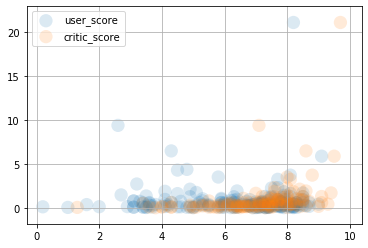

In [250]:
fig, ax = plt.subplots()


color = 'tab:blue'
x = z.user_score
t = z.critic_score
y = z.sum_sales
scale = 200.0 * np.random.rand()
ax.scatter(x, y, c=color, s=scale, label='user_score',
               alpha=0.16, edgecolors='none')

color = 'tab:orange'
ax.scatter(t, y, c=color, s=scale, label='critic_score',
               alpha=0.16, edgecolors='none')


ax.legend()

ax.grid(True)

plt.show()

In [251]:
z.corr()

,user_score,critic_score,sum_sales
user_score,1.000000,0.599920,0.002394
critic_score,0.599920,1.000000,0.334285
sum_sales,0.002394,0.334285,1.000000


Мы видим, что зависимость между оценкой критиков и количеством продаж присутствует, но судя по графику слабая.
В то же время зависимость между продажами и оценкой пользователей либо отсутстввует, либо крайне незначительна.

##### Изучим зависимость для платформы PS4 и X360

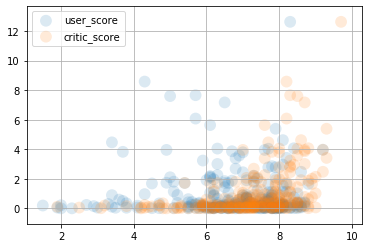

,user_score,critic_score,sum_sales
user_score,1.000000,0.557654,-0.031957
critic_score,0.557654,1.000000,0.406568
sum_sales,-0.031957,0.406568,1.000000


In [252]:
z = df_actual.query('platform == "PS4" and user_score != 0 and critic_score != 0')[['user_score', 'critic_score', 'sum_sales']]

fig, ax = plt.subplots()


color = 'tab:blue'
x = z.user_score
t = z.critic_score
y = z.sum_sales
scale = 200.0 * np.random.rand()
ax.scatter(x, y, c=color, s=scale, label='user_score',
               alpha=0.16, edgecolors='none')

color = 'tab:orange'
ax.scatter(t, y, c=color, s=scale, label='critic_score',
               alpha=0.16, edgecolors='none')


ax.legend()

ax.grid(True)

plt.show()

display(z.corr())

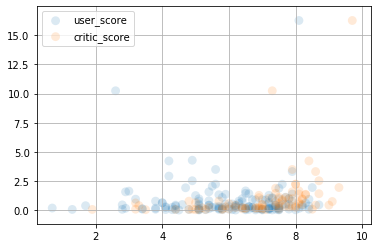

,user_score,critic_score,sum_sales
user_score,1.000000,0.520946,-0.011742
critic_score,0.520946,1.000000,0.350345
sum_sales,-0.011742,0.350345,1.000000


In [253]:
z = df_actual.query('platform == "X360" and user_score != 0 and critic_score != 0')[['user_score', 'critic_score', 'sum_sales']]

fig, ax = plt.subplots()


color = 'tab:blue'
x = z.user_score
t = z.critic_score
y = z.sum_sales
scale = 200.0 * np.random.rand()
ax.scatter(x, y, c=color, s=scale, label='user_score',
               alpha=0.16, edgecolors='none')

color = 'tab:orange'
ax.scatter(t, y, c=color, s=scale, label='critic_score',
               alpha=0.16, edgecolors='none')


ax.legend()

ax.grid(True)

plt.show()

display(z.corr())

На платформах X360 и PS4 заметно присутствует положительная зависимость количества продаж от оценок критиков. И также отсутсвтует зависимость с оценками юзеров.

Посмотрим на картину вцелом:

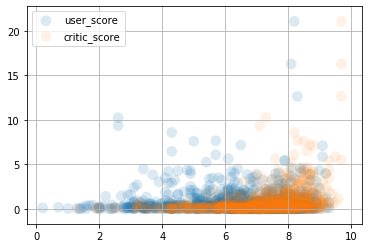

,user_score,critic_score,sum_sales
user_score,1.000000,0.502221,-0.002608
critic_score,0.502221,1.000000,0.313700
sum_sales,-0.002608,0.313700,1.000000


In [254]:
z = df_actual.query('user_score != 0 and critic_score != 0')[['user_score', 'critic_score', 'sum_sales']]

fig, ax = plt.subplots()


color = 'tab:blue'
x = z.user_score
t = z.critic_score
y = z.sum_sales
scale = 200.0 * np.random.rand()
ax.scatter(x, y, c=color, s=scale, label='user_score',
               alpha=0.16, edgecolors='none')

color = 'tab:orange'
ax.scatter(t, y, c=color, s=scale, label='critic_score',
               alpha=0.1, edgecolors='none')


ax.legend()

ax.grid(True)

plt.show()

display(z.corr())

На данном графике уже более отчетливо прослеживается положительная корреляция между оценками критиков и продажами.

##### Изучим распределения продаж по годам в разрезе жанров.

In [255]:
df_actual.groupby('genre').sum_sales.sum().sort_values()

genre
Puzzle            3.17
Strategy         10.08
Simulation       21.76
Adventure        23.64
Fighting         35.31
Racing           39.89
Platform         42.63
Misc             62.82
Role-Playing    145.89
Sports          150.65
Shooter         232.98
Action          321.87
Name: sum_sales, dtype: float64

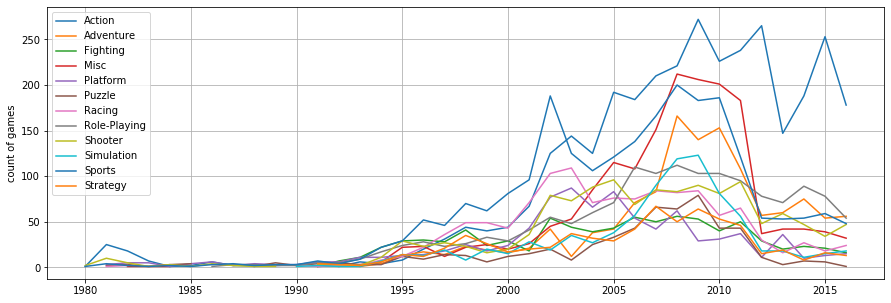

In [256]:

x = (df
       .pivot_table(index='year_of_release', columns='genre', values='sum_sales', aggfunc='count'))

plt.figure(figsize=(15, 5))
plt.plot(x)
plt.legend(x.columns.tolist())
plt.ylabel('count of games')
plt.grid(True)
plt.show()

На данном графике мы видим сильный отрыв жанра Action в количестве продаж, и относительно высокие позиции у Misc, Shooter, adventure и sport.

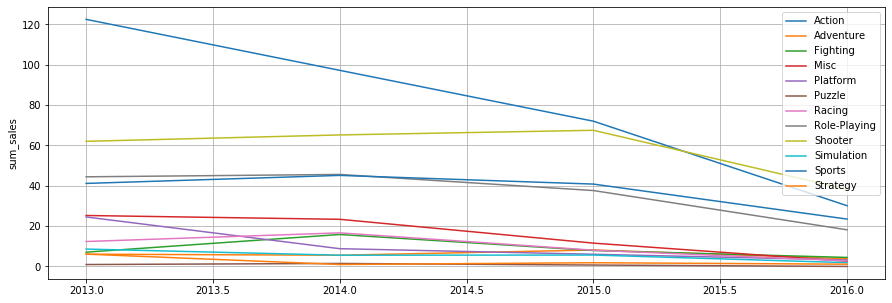

In [257]:

x = (df_actual
       .pivot_table(index='year_of_release', columns='genre', values='sum_sales', aggfunc='sum'))

plt.figure(figsize=(15, 5))
plt.plot(x)
plt.legend(x.columns.tolist())
plt.ylabel('sum_sales')
plt.grid(True)
plt.show()

Мы видим на графике, что за период 2011 - 2016г. больше всего игр было продано с жанром Action, shooter, role-playing и sports. 


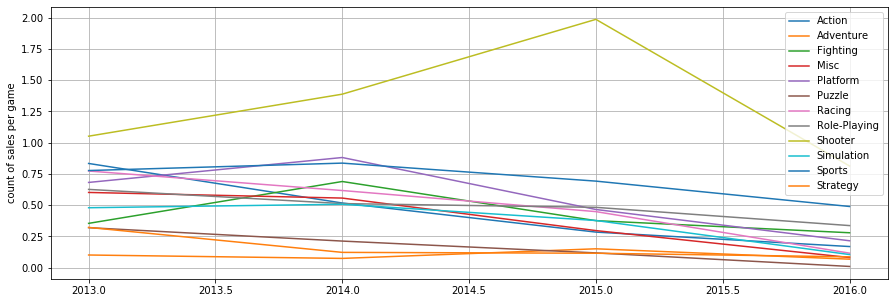

In [258]:

x = (df_actual
       .pivot_table(index='year_of_release', columns='genre', values='sum_sales', aggfunc='sum'))
x = x / (df_actual
       .pivot_table(index='year_of_release', columns='genre', values='sum_sales', aggfunc='count'))

plt.figure(figsize=(15, 5))
plt.plot(x)
plt.legend(x.columns.tolist())
plt.ylabel('count of sales per game')
plt.grid(True)
plt.show()

Данный график отражает количество продаж на одну игру по жанрам, и здесь мы уже видим, что игры жанра shooter являются самыми продаваемыми, также action, fighting и role-playing.

### Вывод
Мы выяснили, что самыми продаваемыми играми за последние годы были игры с жанрами Action, shooter, fighting и role-playing.

Именно на них стоит обратить внимание в 2017 году. Но также видна тенденция к снижению количества выпускаемыхх игр. Вероятно это связано с повышением времени на создание более качественных игр, в связи с развитием технологий.

Также стоит обратить внимание на оценки критиков. Они достаточно сильно влияют на количество продаж.

#### <a href='#main'>К оглавлению</a> 

## Шаг 4. Составим портрет пользователя каждого региона
<a id='step_4'></a>
Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы.

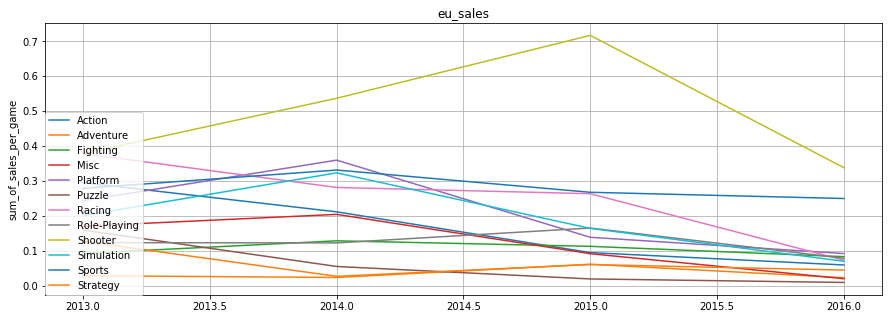

genre
Shooter       0.47
Sports        0.28
Racing        0.24
Platform      0.21
Simulation    0.18
Name: eu_sales, dtype: float64

In [259]:
#eu_sales
sum_sales = (df_actual
       .pivot_table(index='year_of_release', columns='genre', values='eu_sales', aggfunc='sum'))
count_games = (df_actual
       .pivot_table(index='year_of_release', columns='genre', values='eu_sales', aggfunc='count'))
x = sum_sales / count_games

plt.figure(figsize=(15, 5))
plt.plot(x)
plt.legend(x.columns.tolist(), loc=(0.0, 0.0))
plt.ylabel('sum_of_sales_per_game')
plt.title('eu_sales')
plt.grid(True)
plt.show()
display((df_actual.groupby('genre').eu_sales.sum() /
       df_actual.groupby('genre').eu_sales.count()).sort_values(ascending=False).round(2).head())

##### Как мы видим на графике, для европы наиболее продаваемые игры c жанром Shooter, Platform, Sports, Racing, Action

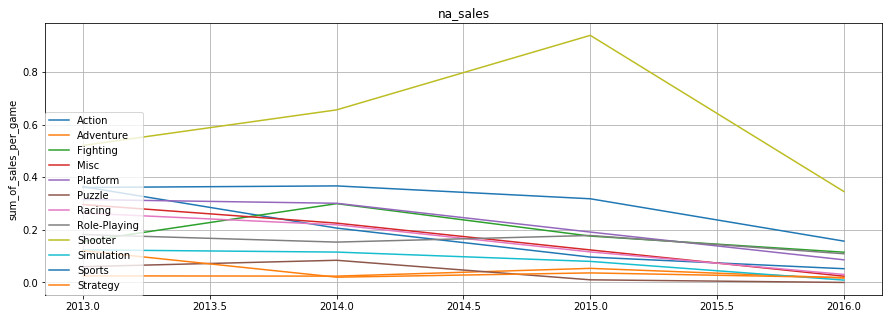

genre
Shooter     0.59
Sports      0.31
Platform    0.25
Fighting    0.19
Misc        0.18
Name: na_sales, dtype: float64

In [260]:
#na_sales
sum_sales = (df_actual
       .pivot_table(index='year_of_release', columns='genre', values='na_sales', aggfunc='sum'))
count_games = (df_actual
       .pivot_table(index='year_of_release', columns='genre', values='na_sales', aggfunc='count'))
x = sum_sales / count_games

plt.figure(figsize=(15, 5))
plt.plot(x)
plt.legend(x.columns.tolist(), loc=(0.0, 0.0))
plt.ylabel('sum_of_sales_per_game')
plt.title('na_sales')
plt.grid(True)
plt.show()
display((df_actual.groupby('genre').na_sales.sum() /
       df_actual.groupby('genre').na_sales.count()).sort_values(ascending=False).round(2).head())

##### Для Северной Америки наиболее продаваемые игры c жанром Shooter , Platform, Sports, Fighting, Misc   

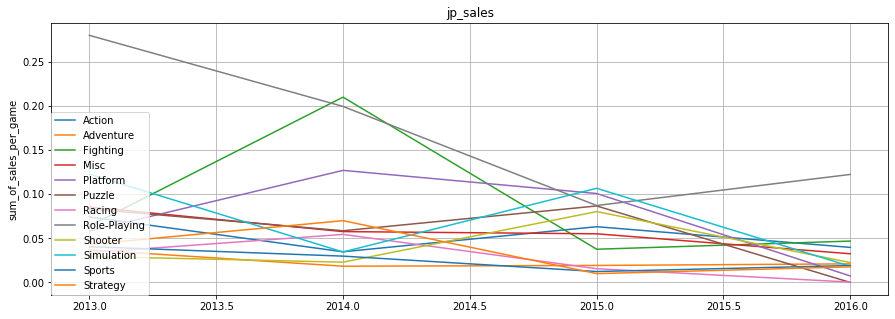

genre
Role-Playing    0.17
Fighting        0.10
Simulation      0.07
Puzzle          0.07
Platform        0.06
Name: jp_sales, dtype: float64

In [261]:
#jp_sales
sum_sales = (df_actual
       .pivot_table(index='year_of_release', columns='genre', values='jp_sales', aggfunc='sum'))
count_games = (df_actual
       .pivot_table(index='year_of_release', columns='genre', values='jp_sales', aggfunc='count'))
x = sum_sales / count_games


plt.figure(figsize=(15, 5))
plt.plot(x)
plt.legend(x.columns.tolist(), loc=(0.0, 0.0))
plt.ylabel('sum_of_sales_per_game')
plt.title('jp_sales')
plt.grid(True)
plt.show()
display((df_actual.groupby('genre').jp_sales.sum() /
       df_actual.groupby('genre').jp_sales.count()).sort_values(ascending=False).round(2).head())

##### Для Японии  наиболее продаваемые игры c жанром Role-Playing, Platform, Simulation, Fighting, Action

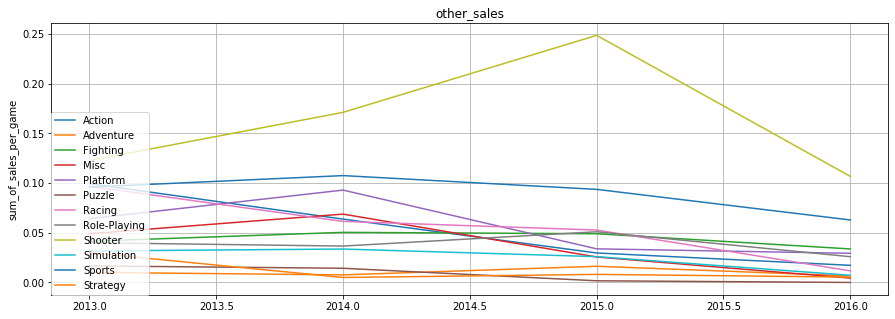

genre
Shooter     0.15
Sports      0.09
Platform    0.06
Racing      0.05
Action      0.05
Name: other_sales, dtype: float64

In [262]:
#other_sales
sum_sales = (df_actual
       .pivot_table(index='year_of_release', columns='genre', values='other_sales', aggfunc='sum'))
count_games = (df_actual
       .pivot_table(index='year_of_release', columns='genre', values='other_sales', aggfunc='count'))
x = sum_sales / count_games


plt.figure(figsize=(15, 5))
plt.plot(x)
plt.legend(x.columns.tolist(), loc=(0.0, 0.0))
plt.ylabel('sum_of_sales_per_game')
plt.title('other_sales')
plt.grid(True)
plt.show()
display((df_actual.groupby('genre').other_sales.sum() /
       df_actual.groupby('genre').other_sales.count()).sort_values(ascending=False).round(2).head())

##### Для других стран наиболее продаваемые игры c жанром Shooter, Sports, Platform, Racing, Action

#### Теперь мы выясним - влияет ли рейтинг ESRB на продажи в отдельном регионе?

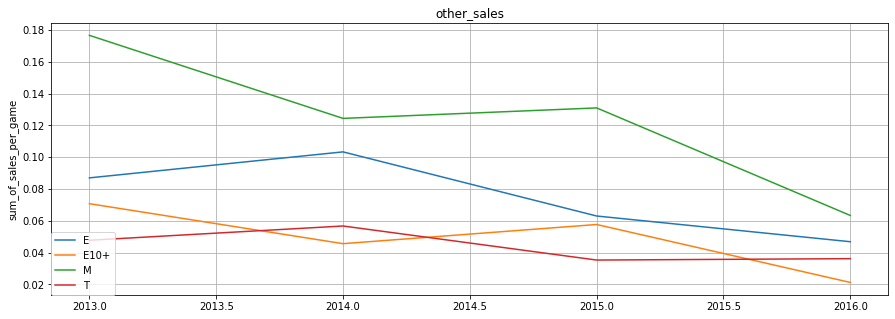

In [263]:
#other_sales
sum_sales = (df_actual
       .query('rating !="Nan"')
       .pivot_table(index='year_of_release', columns='rating', values='other_sales', aggfunc='sum'))
count_games = (df_actual
       .query('rating !="Nan"')
       .pivot_table(index='year_of_release', columns='rating', values='other_sales', aggfunc='count'))
x = sum_sales / count_games

plt.figure(figsize=(15, 5))
plt.plot(x)
plt.legend(x.columns.tolist(), loc=(0.0, 0.0))
plt.ylabel('sum_of_sales_per_game')
plt.title('other_sales')
plt.grid(True)
plt.show()

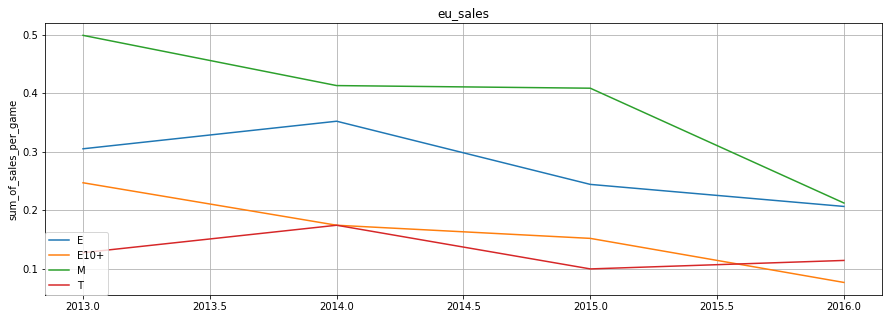

In [264]:
#eu_sales
sum_sales = (df_actual
       .query('rating !="Nan"')
       .pivot_table(index='year_of_release', columns='rating', values='eu_sales', aggfunc='sum'))
count_games = (df_actual
       .query('rating !="Nan"')
       .pivot_table(index='year_of_release', columns='rating', values='eu_sales', aggfunc='count'))
x = sum_sales / count_games

plt.figure(figsize=(15, 5))
plt.plot(x)
plt.legend(x.columns.tolist(), loc=(0.0, 0.0))
plt.ylabel('sum_of_sales_per_game')
plt.title('eu_sales')
plt.grid(True)
plt.show()

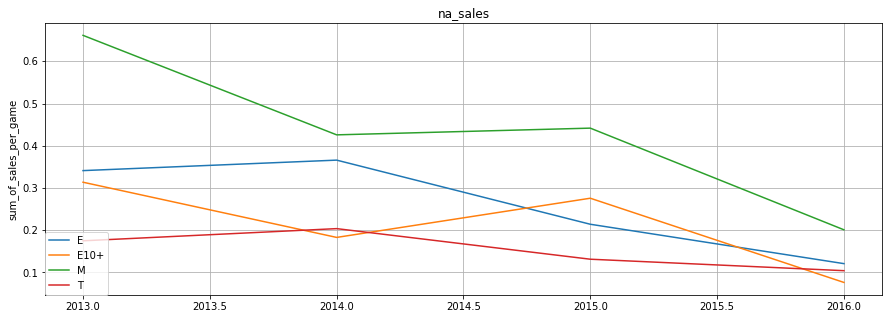

In [265]:
#na_sales
sum_sales = (df_actual
       .query('rating !="Nan"')
       .pivot_table(index='year_of_release', columns='rating', values='na_sales', aggfunc='sum'))
count_games = (df_actual
       .query('rating !="Nan"')
       .pivot_table(index='year_of_release', columns='rating', values='na_sales', aggfunc='count'))
x = sum_sales / count_games

plt.figure(figsize=(15, 5))
plt.plot(x)
plt.legend(x.columns.tolist(), loc=(0.0, 0.0))
plt.ylabel('sum_of_sales_per_game')
plt.title('na_sales')
plt.grid(True)
plt.show()

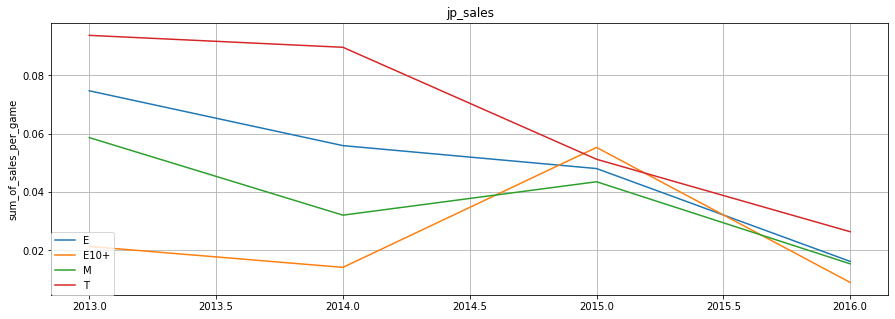

In [266]:
#jp_sales
sum_sales = (df_actual
       .query('rating !="Nan"')
       .pivot_table(index='year_of_release', columns='rating', values='jp_sales', aggfunc='sum'))
count_games = (df_actual
       .query('rating !="Nan"')
       .pivot_table(index='year_of_release', columns='rating', values='jp_sales', aggfunc='count'))
x = sum_sales / count_games

plt.figure(figsize=(15, 5))
plt.plot(x)
plt.legend(x.columns.tolist(), loc=(0.0, 0.0))
plt.ylabel('sum_of_sales_per_game')
plt.title('jp_sales')
plt.grid(True)
plt.show()

#### Теперь посмотрим на продажи по платформам и по регионам

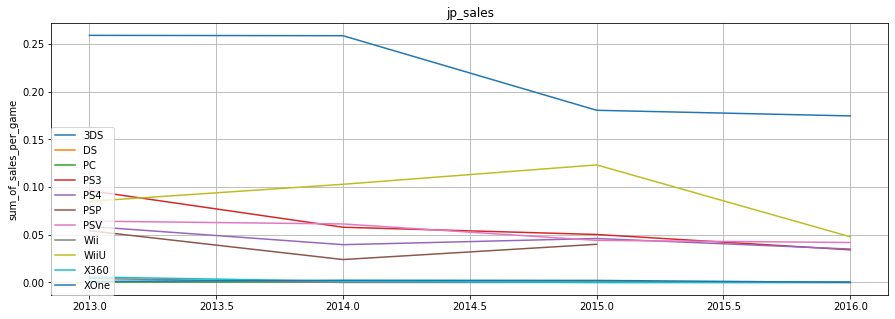

In [267]:
#jp_sales
sum_sales = (df_actual
       .query('rating !="Nan"')
       .pivot_table(index='year_of_release', columns='platform', values='jp_sales', aggfunc='sum'))
count_games = (df_actual
       .query('rating !="Nan"')
       .pivot_table(index='year_of_release', columns='platform', values='jp_sales', aggfunc='count'))
x = (sum_sales / count_games)
plt.figure(figsize=(15, 5))
plt.plot(x)
plt.legend(x.columns.tolist(), loc=(0.0, 0.0))
plt.ylabel('sum_of_sales_per_game')
plt.title('jp_sales')
plt.grid(True)
plt.show()

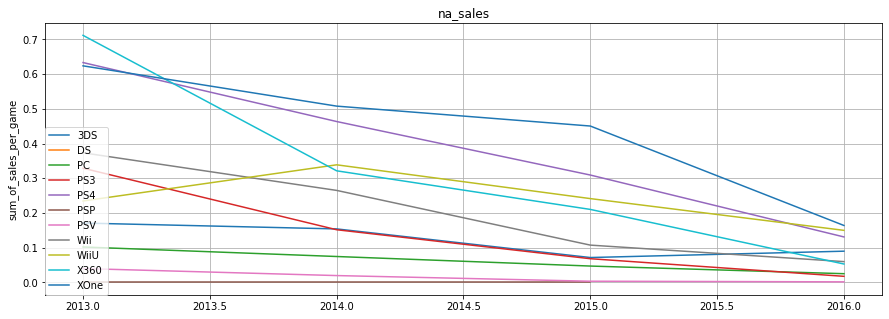

In [268]:
#na_sales
sum_sales = (df_actual
       .query('rating !="Nan"')
       .pivot_table(index='year_of_release', columns='platform', values='na_sales', aggfunc='sum'))
count_games = (df_actual
       .query('rating !="Nan"')
       .pivot_table(index='year_of_release', columns='platform', values='na_sales', aggfunc='count'))
x = sum_sales / count_games

plt.figure(figsize=(15, 5))
plt.plot(x)
plt.legend(x.columns.tolist(), loc=(0.0, 0.0))
plt.ylabel('sum_of_sales_per_game')
plt.title('na_sales')
plt.grid(True)
plt.show()

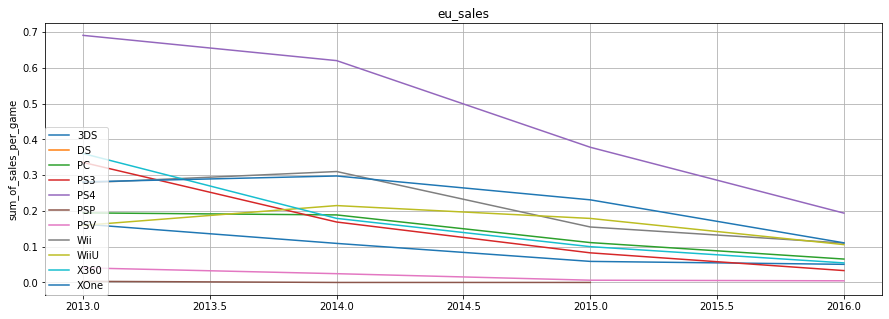

In [269]:
#eu_sales
sum_sales = (df_actual
       .query('rating !="Nan"')
       .pivot_table(index='year_of_release', columns='platform', values='eu_sales', aggfunc='sum'))
count_games = (df_actual
       .query('rating !="Nan"')
       .pivot_table(index='year_of_release', columns='platform', values='eu_sales', aggfunc='count'))
x = sum_sales / count_games

plt.figure(figsize=(15, 5))
plt.plot(x)
plt.legend(x.columns.tolist(), loc=(0.0, 0.0))
plt.ylabel('sum_of_sales_per_game')
plt.title('eu_sales')
plt.grid(True)
plt.show()

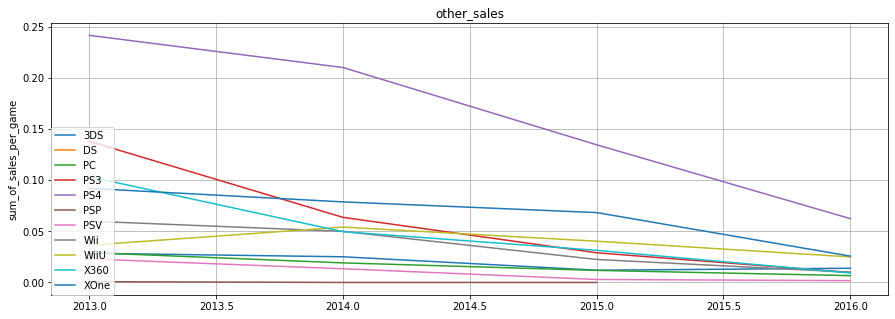

In [270]:
#other_sales
sum_sales = (df_actual
       .query('rating !="Nan"')
       .pivot_table(index='year_of_release', columns='platform', values='other_sales', aggfunc='sum'))
count_games = (df_actual
       .query('rating !="Nan"')
       .pivot_table(index='year_of_release', columns='platform', values='other_sales', aggfunc='count'))
x = sum_sales / count_games

plt.figure(figsize=(15, 5))
plt.plot(x)
plt.legend(x.columns.tolist(), loc=(0.0, 0.0))
plt.ylabel('sum_of_sales_per_game')
plt.title('other_sales')
plt.grid(True)
plt.show()

Проанализировав данные продаж по платформам в разных странах мы выяснили, что самые популярные игры распределены в следующем порядке:


Япония - 3DS, WiiU, PS3, PS5
Северная АМерика - XOne, X360, PS4 WiiU
Европа - PS4, XOne, Wii, WiiU
Другие страны - PS4, PS3, XOne, WiiU

Заметно, что в Японии и Северной Америке больше всего пользуются платформой XOne, в то вркмя как в европе и др странах предпочитают больше PS4.

  
Наоборот, в Японии мы явно видим, что Майкрософт вообще не представлен в топ-5, явно лидируют отечественные производители, а особенно портативные консоли.

В Америке и Европе же наоборот стационарки, но Америка в большей степени поддерживает отчественного производителя,тогда как Европа Сони. Касаемо жанром и рейтингов явно видно, что Америка и Европа любят динамичные игры и высокий рейтинг, Япония же спокойные игры и не таким жестоким рейтингом.


На графиках видно, что практически нет разницы в предпочтениях между группами, за исключением Японии. 
В Японии популярность категории "T" поднимается на верхние позиции в сравнении с другими странами.

### Вывод
Мы выяснили, что самые продаваемые жанры это Shooter, Platform, Sports, Racing, Action. 
В Японии топ 5 жанров немного отличается. В нем лидирующую позицию занимает Role-Playing и присутствует Simulation в топе.
Так же Япония отличается и предпочтениями в возврастной категории.

#### <a href='#main'>К оглавлению</a> 

## Шаг 5. Гипотезы
<a id='step_5'></a>

#### Проверим гипотезы:
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») 

##### Для этого сформулируем нулевую гипотезу о равенстве выборок и альтернативную о не равенстве:

#### H₀ средние пользовательские рейтинги платформ Xbox One и PC не различается;

#### H₁ средние пользовательские рейтинги платформ Xbox One и PC различается;


In [281]:
df_actual.platform.unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

In [282]:
mean_rate_of_XboxOne = df_actual.query('platform =="XOne" and user_score !=0').user_score
mean_rate_of_PC = df_actual.query('platform =="PC" and user_score !=0').user_score

Проверим выборки на нормальность

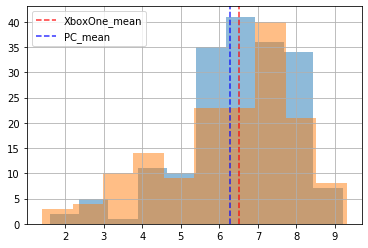

(0.955055296421051, 1.524856543255737e-05) (0.9416003823280334, 5.039790721639292e-06)


In [283]:
x = mean_rate_of_XboxOne
y = mean_rate_of_PC

x.hist(alpha=0.5)
y.hist(alpha=0.5)
plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
plt.legend(['XboxOne_mean', 'PC_mean'])
plt.show()
print(
st.shapiro(mean_rate_of_XboxOne.dropna()),
st.shapiro(mean_rate_of_PC.dropna())
)

Тест Шапиро говорит о ненормальности выборок, т.к. значение P-value < 0.05

Поэтому используем критерий Манна-Уитни.

In [284]:
st.mannwhitneyu(x, y)

MannwhitneyuResult(statistic=20326.0, pvalue=0.01036913423211278)

##### P-value > 0.05 - Значит среднее двух выборок различаются статистически не значимо, нет оснований отклонять нулевую гипотезу, поэтому принимаем ее.

#### H₀ средние пользовательские рейтинги жанров Action и Sports не различается;

#### H₁ средние пользовательские рейтинги жанров Action и Sports различается;


In [285]:
mean_rate_of_Action = df_actual.query('genre =="Action" and user_score !=0').user_score
mean_rate_of_Sports = df_actual.query('genre =="Sports" and user_score !=0').user_score

Проверим выборки на нормальность

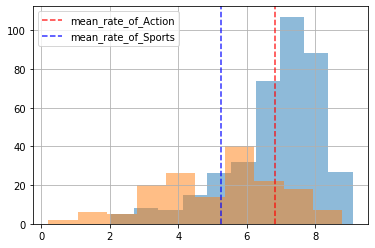

(0.9072277545928955, 1.0798927229597587e-14) (0.9816822409629822, 0.03234051540493965)


In [286]:
x = mean_rate_of_Action
y = mean_rate_of_Sports

x.hist(alpha=0.5)
y.hist(alpha=0.5)
plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
plt.legend(['mean_rate_of_Action', 'mean_rate_of_Sports'])
plt.show()
print(
st.shapiro(mean_rate_of_Action.dropna()),
st.shapiro(mean_rate_of_Sports.dropna())
)

Тест Шапиро говорит о ненормальности выборок, т.к. значение P-value < 0.05

Поэтому используем критерий Манна-Уитни.

In [287]:
st.mannwhitneyu(x, y)

MannwhitneyuResult(statistic=41214.0, pvalue=4.395883359224208e-29)

##### P-value < 0.05 - Значит среднее двух выборок различаются статистически значимо, нулевая гипотезаа отклоняется и принимаем альтернативную.

### Вывод
Мы проверили гипотезы и получили следующий результат:

H₀ средние пользовательские рейтинги платформ Xbox One и PC не различается; Мы приянли нулевую гипотезу из-за статистически незначимых различиях между средними.

H₁ средние пользовательские рейтинги жанров Action и Sports различается; Мы отклонили нулевыую гипотезу и приняли альтернативную, потому что различия между средними оказались статитсически значимы.

#### <a href='#main'>К оглавлению</a> 

## Шаг 5. Вывод
<a id='step_6'></a>



#### Мы изучили данные об исторических данных о продажах игр, оценки пользователей и экспертов, жанров и платформ и выявили следующие закономерности:


##### Cамыми продаваемыми играми за последние годы были игры с жанрами Action, shooter, fighting и role-playing.
Именно на них стоит обратить внимание в 2017 году. Но также видна тенденция к снижению количества выпускаемыхх игр. Вероятно это связано с повышением времени на создание более качественных игр, в связи с развитием технологий.
Также стоит обратить внимание на оценки критиков. Они достаточно сильно влияют на количество продаж.

##### PS2, PS3, Wii, DS, 3DS, X360, PS4 - самые объемные платформы по уровню продаж, сокращаются продажи игр по всем платформам вцелом, вероятно рынок ожидает выпуск новых, более мощных платформ, а вместе с ними и новые игры.

##### Мы выяснили, что потребители в разных странах имеют схожие вкусы, за исключением одной страны - Япония.
В Японии топ 5 жанров немного отличается от ТОПа остальных. В нем лидирующую позицию занимает Role-Playing и присутствует Simulation.

Так же Япония отличается и предпочтениями в возврастной категории.

##### Также мы выяснили, что средние пользовательские рейтинги платформ Xbox One и PC не различается, а средние пользовательские рейтинги жанров Action и Sports различается между собой.

------------